<h1><p style='text-align: center;'>Traffic Police Stops</p><h1> Preparing The Data For Analysis 

Before beginning our analysis, it is critical that we first examine and clean the dataset, to make working with it a more efficient process. We will practice fixing data types, handling missing values, and dropping columns and rows while learning about the Stanford Open Policing Project dataset.

## Examining the dataset

We'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the Stanford Open Policing Project.

**INSTRUCTIONS**

*   Import related libraries with their alias.
*   Read the file RI_cleaned.csv into a DataFrame named ``ri``
*   Examine the first 5 rows of the ``DataFrame`` (known as the ``"head"``).
*   Examine the last 5 rows of the ``DataFrame`` (known as the ``"tail"``).
*   Examine the ``DataFrame``'s ``"columns"``.
*   Count the number of missing values in each column: Use ``.isnull()`` to check which ``DataFrame`` elements are missing, and then take the ``.sum()`` to count the number of ``True`` values in each column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Since the dataset has 509681 rows, you can work with the first 50000 rows if you wish.**

In [2]:
ri = pd.read_csv("RI_cleaned.csv")

C:\Users\Esra\AppData\Local\Temp\ipykernel_8576\3903740968.py:1: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv("RI_cleaned.csv")


In [3]:
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [4]:
ri.tail()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
509676,RI-NA-06,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509677,RI-NA-07,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509678,RI-NA-08,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509679,RI-NA-09,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509680,RI-NA-10,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA


In [5]:
ri.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

In [6]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

## Dropping columns

Often, a DataFrame will contain columns that are not useful to our analysis. Such columns should be dropped from the ``DataFrame``, to make it easier for us to focus on the remaining columns.

We'll drop the ``county_name`` column because it only contains missing values, and we'll drop the ``state`` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

**INSTRUCTIONS**

*   Examine the ``DataFrame``'s shape to find out the number of rows and columns.

*   Drop the columns that almost consist of missing values. 

*   Examine the ``.shape`` again to verify that there are now two fewer columns.

In [7]:
ri.shape

(509681, 26)

In [8]:
ri.drop(columns=["county_name","state"],inplace=True)

In [9]:
ri.shape

(509681, 24)

## Dropping rows

When we know that a specific column will be critical to our analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the ``driver_gender`` column will be critical to many of our analyses. Because only a small fraction of rows are missing ``driver_gender``, we'll drop those rows from the dataset.

**INSTRUCTIONS**

*   Count the number of missing values in each column.

*   Drop all rows that are missing ``driver_gender`` by passing the column name to the subset parameter of ``.dropna()``.
*   Count the number of missing values in each column again, to verify that none of the remaining rows are missing ``driver_gender``.
*   Examine the ``DataFrame``'s ``.shape`` to see how many rows and columns remain.

In [10]:
ri.isnull().sum()

id                            0
stop_date                    10
stop_time                    10
location_raw                  0
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [11]:
ri.dropna(subset=["driver_gender"],inplace=True)

In [12]:
ri.isnull().sum()

id                            0
stop_date                     0
stop_time                     0
location_raw                  0
county_fips              480584
fine_grained_location    480584
police_department             0
driver_gender                 0
driver_age_raw                1
driver_age                 1638
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          462822
search_type              462822
contraband_found              0
stop_outcome                  0
is_arrested                   0
stop_duration                 0
out_of_state                808
drugs_related_stop            0
district                      0
dtype: int64

In [13]:
ri.shape

(480584, 24)

## Fixing a data type

We know that the ``is_arrested`` column currently has the ``object`` data type. In this exercise, we'll change the data type to ``bool``, which is the most suitable type for a column containing ``True`` and ``False`` values.

Fixing the data type will enable us to use mathematical operations on the ``is_arrested`` column that would not be possible otherwise.

**INSTRUCTIONS**

*   Examine the values of the ``is_arrested`` column to verify that it contains ``True`` and ``False`` values.
*   Check the current data type of ``is_arrested``.
*   Use the ``.astype()`` method to convert ``is_arrested`` to a ``bool`` column.
*   Check the new data type of ``is_arrested``, to confirm that it is now a ``bool`` column.

In [14]:
ri["is_arrested"].value_counts()

is_arrested
False    463981
True      16603
Name: count, dtype: int64

In [15]:
ri["is_arrested"].dtype

dtype('O')

In [16]:
ri["is_arrested"] = ri["is_arrested"].astype(bool)

In [17]:
ri["is_arrested"].dtype

dtype('bool')

## Combining object columns

Currently, the date and time of each traffic stop are stored in separate object columns: ``stop_date`` and ``stop_time``.

We'll combine these two columns into a single column, and then convert it to ``datetime`` format. This will enable convenient date-based attributes that we'll use later in the course.

**INSTRUCTIONS**

*    Get the first row of the data frame and see the dtypes of ``stop_date`` and ``stop_time`` columns.
*    Use a string method to concatenate ``stop_date`` and ``stop_time`` (separated by a space), and store the result in ``combined``.
*    Convert ``combined`` to ``datetime`` format, and store the result in a new column named ``stop_datetime``.
*    Drop ``stop_date`` and ``stop_time`` columns from dataframe and check after dropping by getting first row.
*    Examine the ``DataFrame`` ``.dtypes`` to confirm that ``stop_datetime`` is a datetime column.

In [18]:
ri.head(1)

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1


In [19]:
ri["stop_date"].dtype

dtype('O')

In [20]:
ri["stop_time"].dtype

dtype('O')

In [21]:
ri['combined'] = ri['stop_date'] + ' ' + ri['stop_time']

In [22]:
ri['stop_datetime'] = pd.to_datetime(ri['combined'])
ri['stop_datetime']

0        2005-01-02 01:55:00
1        2005-01-02 20:30:00
3        2005-01-04 12:55:00
4        2005-01-06 01:30:00
5        2005-01-12 08:05:00
                 ...        
509666   2015-12-31 22:46:00
509667   2015-12-31 22:47:00
509668   2015-12-31 23:08:00
509669   2015-12-31 23:44:00
509670   2015-12-31 23:48:00
Name: stop_datetime, Length: 480584, dtype: datetime64[ns]

In [23]:
ri.drop(columns=["stop_date","stop_time"],inplace=True)

In [24]:
ri.head(1)

,id,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,stop_datetime
0,RI-2005-00001,Zone K1,NaN,NaN,600,M,1985.0,20.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,2005-01-02 01:55:00


In [25]:
ri.dtypes

id                               object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                 object
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
combined                         object
stop_datetime            datetime64[ns]
dtype: object

The last step that we'll take in this chapter is to set the ``stop_datetime`` column as the ``DataFrame``'s index. By replacing the default index with a ``DatetimeIndex``, we'll make it easier to analyze the dataset by date and time, which will come in handy later in the course.

**INSTRUCTIONS**

*   First check out the shape of the dataframe.
*   Set ``stop_datetime`` as the ``DataFrame`` index.
*   Examine the index to verify that it is a ``DatetimeIndex``.
*   Check again the shape of the dataframe to confirm that ``stop_datetime`` is no longer one of the columns. 
*   Examine the ``DataFrame`` columns to confirm that ``stop_datetime`` is no longer one of the columns.

In [26]:
ri.shape

(480584, 24)

In [27]:
ri.set_index('stop_datetime', inplace=True)

In [28]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

In [29]:
ri.shape

(480584, 23)

In [30]:
ri.columns

Index(['id', 'location_raw', 'county_fips', 'fine_grained_location',
       'police_department', 'driver_gender', 'driver_age_raw', 'driver_age',
       'driver_race_raw', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type_raw', 'search_type',
       'contraband_found', 'stop_outcome', 'is_arrested', 'stop_duration',
       'out_of_state', 'drugs_related_stop', 'district', 'combined'],
      dtype='object')

**INSTRUCTIONS**

*   Count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.
*   Express the violation counts as proportions of the total.

In [31]:
ri['violation'].value_counts()

violation
Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: count, dtype: int64

In [32]:
ri['violation'].value_counts(normalize=True)

violation
Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: proportion, dtype: float64

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

We'll first create a ``DataFrame`` for each gender, and then analyze the ``violations`` in each ``DataFrame`` separately.

**INSTRUCTIONS**

*   Create a ``DataFrame``, female, that only contains rows in which ``driver_gender`` is ``'F'``.
*   Create a ``DataFrame``, male, that only contains rows in which ``driver_gender`` is ``'M'``.
*   Count the ``violations`` committed by female drivers and express them as proportions.
*   Count the violations committed by male drivers and express them as proportions.

In [33]:
ri_female = ri[ri['driver_gender']=='F']
ri_male = ri[ri['driver_gender']=='M']

In [34]:
ri_female['violation'].value_counts()

violation
Speeding               86198
Moving violation       17911
Equipment              14039
Registration/plates     5649
Other                   3791
Seat belt               3550
Name: count, dtype: int64

In [35]:
ri_female['violation'].value_counts(normalize=True)

violation
Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: proportion, dtype: float64

In [36]:
ri_male['violation'].value_counts()

violation
Speeding               182538
Moving violation        72317
Equipment               47211
Other                   20425
Registration/plates     14181
Seat belt               12774
Name: count, dtype: int64

In [37]:
ri_male['violation'].value_counts(normalize=True)

violation
Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: proportion, dtype: float64

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can we find evidence of this in the dataset?

First, we'll create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, we'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``'Citation'`` (meaning a ticket) versus a ``'Warning'``.

**INSTRUCTIONS**

*   Create a ``DataFrame``, ``female_and_speeding``, that only includes female drivers who were stopped for speeding.
*   Create a ``DataFrame``, ``male_and_speeding``, that only includes male drivers who were stopped for speeding.
*   Count the **stop outcomes** for the female drivers and express them as proportions.
*   Count the **stop outcomes** for the male drivers and express them as proportions.

In [38]:
female_and_speeding = ri_female[ri_female['violation']=='Speeding']
male_and_speeding = ri_male[ri_male['violation']=='Speeding']

In [39]:
female_and_speeding['stop_outcome'].value_counts()

stop_outcome
Citation            82168
Warning              3362
Arrest Driver         456
Arrest Passenger       89
N/D                    78
No Action              45
Name: count, dtype: int64

In [40]:
female_and_speeding['stop_outcome'].value_counts(normalize=True)

stop_outcome
Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: proportion, dtype: float64

In [41]:
male_and_speeding['stop_outcome'].value_counts()

stop_outcome
Citation            172432
Warning               6587
Arrest Driver         2878
Arrest Passenger       231
N/D                    216
No Action              194
Name: count, dtype: int64

In [42]:
male_and_speeding['stop_outcome'].value_counts(normalize=True)

stop_outcome
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: proportion, dtype: float64

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, we'll calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.

**INSTRUCTIONS**

*   Check the data type of ``search_conducted`` to confirm that it's a ``Boolean Series``.
*   Calculate the search rate by counting the ``Series`` values and expressing them as proportions.
*   Calculate the search rate by taking the mean of the ``Series``. (It should match the proportion of ``True`` values calculated above.)

In [43]:
ri['search_conducted'].dtype

dtype('O')

In [44]:
ri['search_conducted'].value_counts()

search_conducted
False    462822
True      17762
Name: count, dtype: int64

In [45]:
ri['search_conducted'].mean()

0.036959199640437465

## Comparing search rates by gender 

We'll compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.8%**.

First, we'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, we'll perform the same calculation for both genders at once using a ``.groupby()``.

**INSTRUCTIONS 1/3**

*   Filter the ``DataFrame`` to only include **female** drivers, and then calculate the search rate by taking the mean of ``search_conducted``.

In [46]:
ri_female['search_conducted'].value_counts()

search_conducted
False    128679
True       2459
Name: count, dtype: int64

In [47]:
ri_female['search_conducted'].mean()

0.018751239152648355

**INSTRUCTIONS 2/3**

*   Filter the ``DataFrame`` to only include **male** drivers, and then repeat the search rate calculation.

In [48]:
ri_male['search_conducted'].value_counts()

search_conducted
False    334143
True      15303
Name: count, dtype: int64

In [49]:
ri_male['search_conducted'].mean()

0.04379217389811301

In [50]:
ri.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: object

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation. 

**INSTRUCTIONS 1/2**

*   Use a ``.groupby()`` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [51]:
ri.groupby(['driver_gender','violation'])['search_conducted'].sum()

driver_gender  violation          
F              Equipment               565
               Moving violation        681
               Other                   174
               Registration/plates     309
               Seat belt                63
               Speeding                667
M              Equipment              3348
               Moving violation       4278
               Other                   942
               Registration/plates    1469
               Seat belt               405
               Speeding               4861
Name: search_conducted, dtype: object

**INSTRUCTIONS 2/2**

*   Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [52]:
ri.groupby(['violation','driver_gender'])['search_conducted'].sum()

violation            driver_gender
Equipment            F                 565
                     M                3348
Moving violation     F                 681
                     M                4278
Other                F                 174
                     M                 942
Registration/plates  F                 309
                     M                1469
Seat belt            F                  63
                     M                 405
Speeding             F                 667
                     M                4861
Name: search_conducted, dtype: object

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``'protective frisk.'``

We'll first check to see how many times 'Protective Frisk' was the only search type. Then, we'll use a string method to locate all instances in which the driver was frisked.

**INSTRUCTIONS**

*   Count the ``search_type`` values to see how many times ``'Protective Frisk'`` was the only search type.
*   Create a new column, frisk, that is ``True`` if ``search_type`` contains the string ``'Protective Frisk'`` and ``False`` otherwise.
*   Check the data type of frisk to confirm that it's a ``Boolean Series``.
*   Take the sum of frisk to count the total number of frisks.

In [53]:
ri['search_type'].value_counts()

search_type
Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Pro

In [54]:
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)

In [55]:
ri.frisk.dtype

dtype('bool')

In [56]:
ri.frisk.value_counts()

frisk
False    478986
True       1598
Name: count, dtype: int64

In [57]:
ri.frisk.sum()

1598

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, we'll find out whether the arrest rate varies by time of day.

First, we'll calculate the arrest rate across all stops. Then, we'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Get the type of the dataframe's index and see the hour of the stop_datetime by using hour attribute
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [58]:
ri['is_arrested'].mean()

0.03454755048024903

In [59]:
ri.index.dtype

dtype('<M8[ns]')

In [60]:
ri.index.hour

Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
       ...
       22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
      dtype='int32', name='stop_datetime', length=480584)

In [61]:
ri.groupby(ri.index.hour)["is_arrested"].mean()

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [62]:
hourly_arrest_rate = ri.groupby(ri.index.hour)["is_arrested"].mean()

## Plotting the hourly arrest rate

We'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because we're showing how a quantity changes over time.

This plot should help us to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

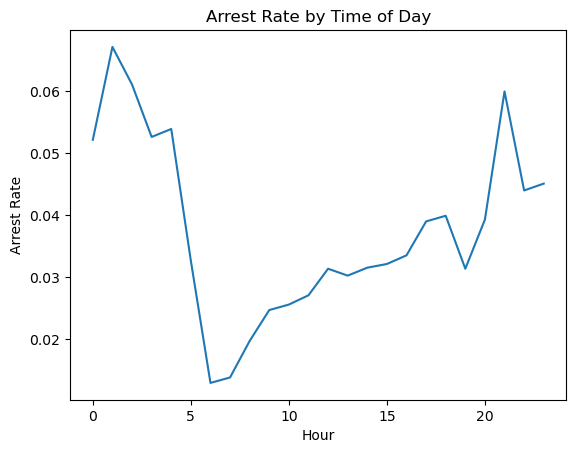

In [63]:
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. We'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. We'll calculate the **annual drug rate** by **resampling** this column, and then we'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [64]:
ri['drugs_related_stop'].resample('A').mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [65]:
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()

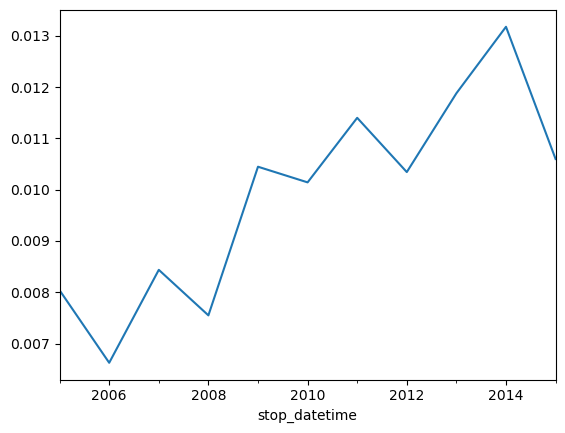

In [66]:
annual_drug_rate.plot()
plt.show()

## Comparing drug and search rates (to be deleted)

As we saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [67]:
ri['search_conducted'].resample('A').mean()

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: object

In [68]:
annual_search_rate = ri['search_conducted'].resample('A').mean()

In [69]:
pd.concat([annual_drug_rate, annual_search_rate], axis=1)

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849
2010-12-31,0.010142,0.042089
2011-12-31,0.011400,0.037767
2012-12-31,0.010343,0.032278
2013-12-31,0.011879,0.029054


In [70]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)
annual.columns = ['Drug Rate', 'Search Rate']

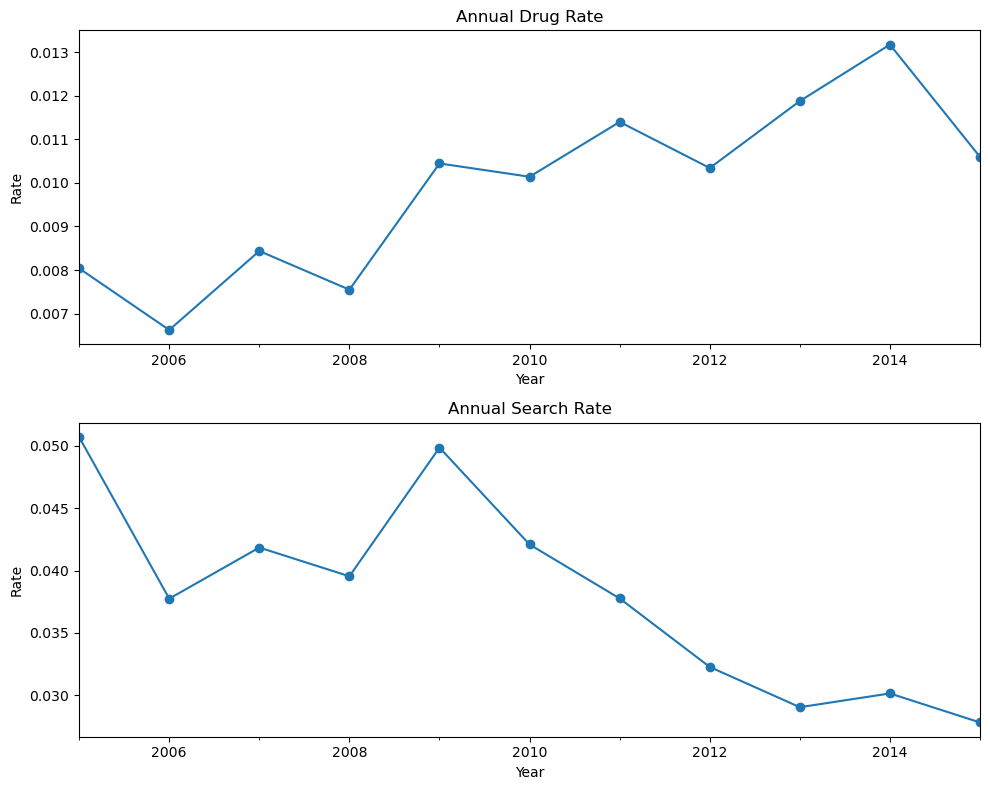

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))


annual['Drug Rate'].plot(ax=axes[0], marker='o', linestyle='-')
axes[0].set_title('Annual Drug Rate')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Rate')


annual['Search Rate'].plot(ax=axes[1], marker='o', linestyle='-')
axes[1].set_title('Annual Search Rate')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Rate')


plt.tight_layout()
plt.show()

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, we'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, we'll filter the table to focus on the ``"K"`` zones, which we'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [72]:
ri.violation.value_counts()

violation
Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: count, dtype: int64

In [73]:
ri.district.value_counts()

district
Zone X4    125670
Zone K3    108868
Zone K2     97281
Zone X3     89431
Zone K1     46110
Zone X1     13224
Name: count, dtype: int64

In [74]:
all_zones = pd.crosstab(ri['district'],ri['violation'])

In [75]:
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [76]:
k_zones = all_zones.loc['Zone K1':'Zone K3']

In [77]:
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


## Plotting violations by district

Now that we've created a frequency table focused on the ``"K"`` zones, we'll visualize the data to help you compare what violations are being caught in each zone.

First we'll create a **bar plot**, which is an appropriate plot type since we're comparing categorical data. Then we'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

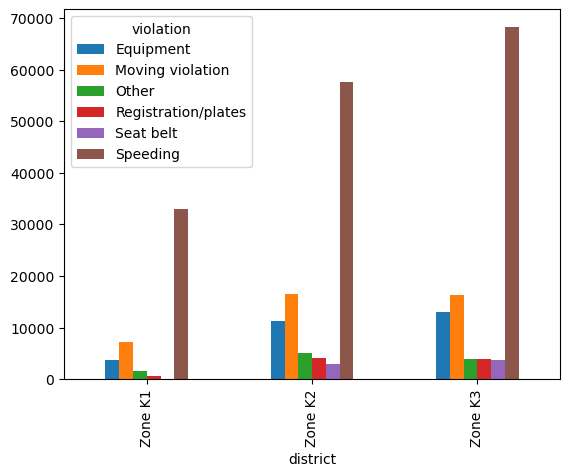

In [78]:
k_zones.plot(kind='bar');

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

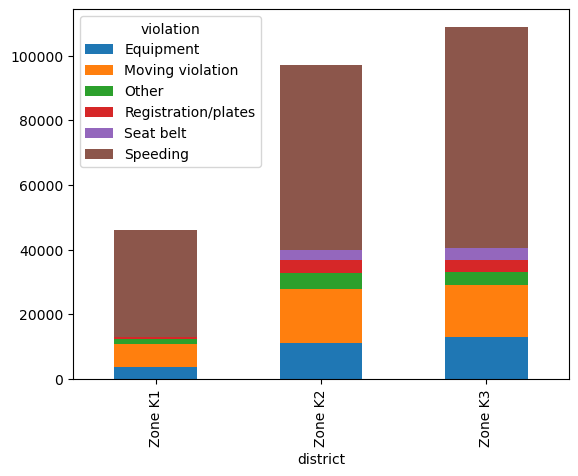

In [79]:
k_zones.plot(kind='bar', stacked=True);

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells us approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can we make this data easier to analyze?

In this exercise, we'll convert the **stop durations** to ``integers``. Because the precise durations are not available, we'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [80]:
ri["stop_duration"].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [81]:
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45, '2': 2, '1': 1}

In [82]:
ri['stop_minutes'] = ri['stop_duration'].replace(mapping)

In [83]:
ri['stop_minutes'].unique()

array([ 8, 23, 45,  2,  1], dtype=int64)

## Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, we'll visualize the **average length** of time drivers are stopped for each **type** of **violation**. Rather than using the ``violation`` column in this exercise, we'll use ``violation_raw`` since it contains more detailed descriptions of the violations.

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [84]:
ri.groupby('violation_raw')['stop_minutes'].mean()

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454155
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.833943
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589143
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [85]:
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

In [86]:
stop_length = stop_length.sort_values()

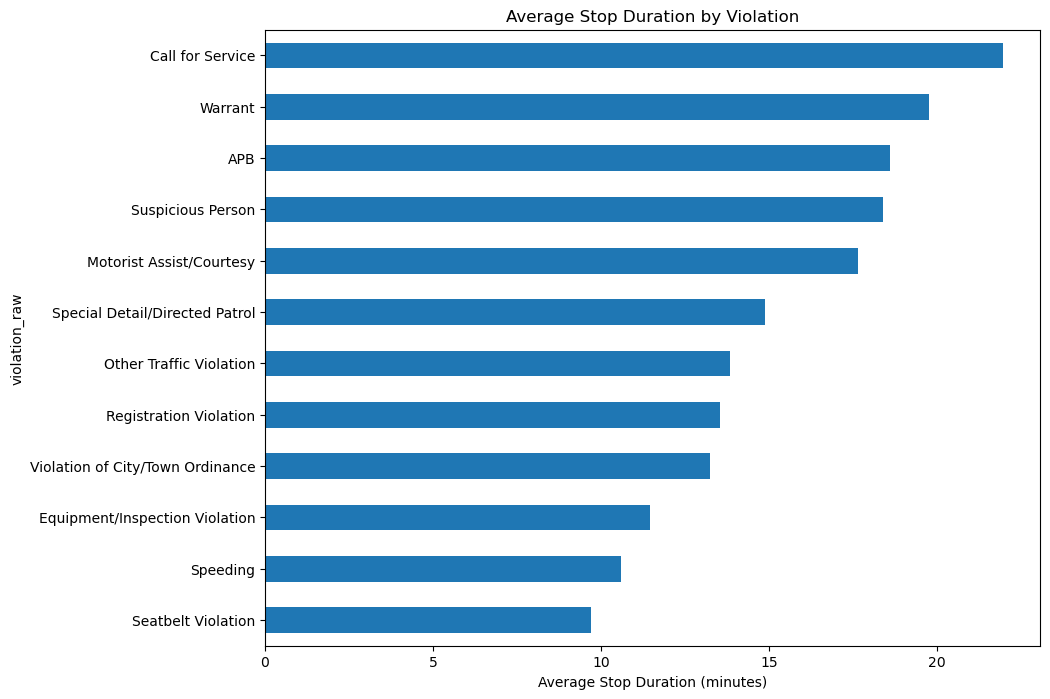

In [87]:
stop_length.plot(kind = 'barh', figsize = (10,8))
plt.xlabel('Average Stop Duration (minutes)')
plt.title('Average Stop Duration by Violation')
plt.show()

# Analyzing The Effect Of Weather on Policing 

In this chapter, we will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. We will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

In this exercise, we'll examine the ``temperature`` columns from the ``weather`` dataset to assess whether the data seems trustworthy. First we'll print the summary statistics, and then we'll visualize the data using a **box plot**.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees **Fahrenheit**, not Celsius!

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``. See first 5 rows and get the shape
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [89]:
weather = pd.read_csv("weather.csv")
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
weather.shape

(8022, 26)

In [91]:
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


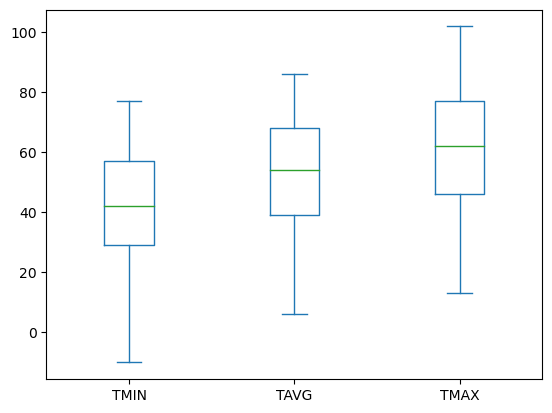

In [94]:
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

## Plotting the temperature difference

In this exercise, we'll continue to assess ``whether`` the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting **histogram**? Does it match your expectations, or do you see anything unusual?

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [100]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
weather['TDIFF'].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

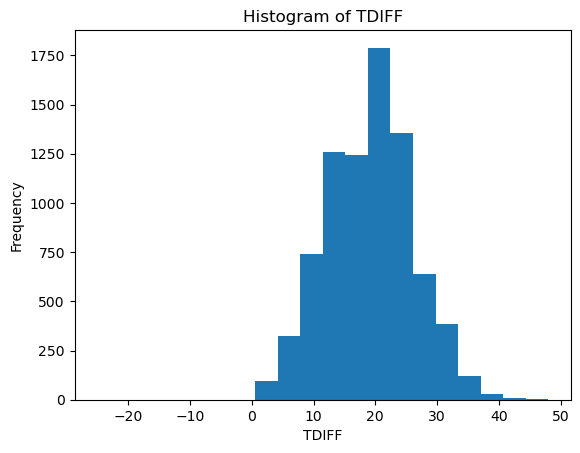

In [103]:
weather['TDIFF'].plot(kind='hist', bins=20)
plt.title('Histogram of TDIFF')
plt.xlabel('TDIFF')
plt.ylabel('Frequency')
plt.show()

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, we'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [108]:
wt_column = [f'WT{i:02d}' for i in range(1, 23)]
existing_columns = [col for col in wt_column if col in weather.columns]

WT = weather[existing_columns].copy()

In [109]:
WT

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8019,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8020,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
weather['bad_conditions'] = WT.sum(axis=1)

In [112]:
weather['bad_conditions'] = weather.bad_conditions.fillna(value = 0)

In [113]:
weather['bad_conditions']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Name: bad_conditions, Length: 8022, dtype: float64

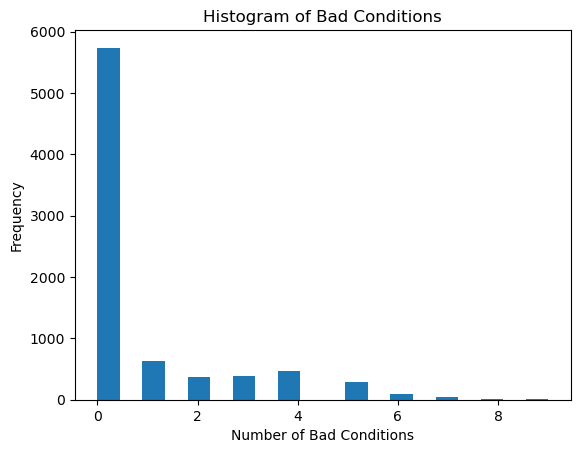

In [116]:
weather['bad_conditions'].plot(kind='hist', bins=20)
plt.title('Histogram of Bad Conditions')
plt.xlabel('Number of Bad Conditions')
plt.ylabel('Frequency')
plt.show()

## Rating the weather conditions 

In the previous exercise, we counted the number of bad weather conditions each day. In this exercise, we'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [118]:
weather['bad_conditions'].value_counts().sort_index()

bad_conditions
0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: count, dtype: int64

In [119]:
mapping = {0: 'good',
           1: 'bad', 2: 'bad', 3: 'bad', 4: 'bad',
           5: 'worse', 6: 'worse', 7: 'worse', 8: 'worse', 9: 'worse'}

In [120]:
weather['rating'] = weather['bad_conditions'].map(mapping)

In [121]:
weather['rating'].value_counts()

rating
good     5738
bad      1852
worse     432
Name: count, dtype: int64

## Changing the data type to category

Since the ``rating`` column only has a few possible values, we'll change its data type to ``category`` in order to store the data more efficiently. We'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [122]:
cats = ['good', 'bad', 'worse']

In [123]:
weather['rating'] = pd.Categorical(weather['rating'], categories=cats, ordered=True)

In [124]:
weather['rating'].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [125]:
weather['rating'].dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

## Preparing the DataFrames

In this exercise, we'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, we'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, we'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

In [130]:
ri.reset_index(inplace=True)
ri.head()

,index,stop_datetime,id,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,frisk,stop_minutes
0,0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,False,8
1,1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30,False,23
2,2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55,False,8
3,3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,NaN,NaN,500,M,1978.0,27.0,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30,False,8
4,4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,NaN,NaN,0,M,1973.0,32.0,...,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05,False,45


In [133]:
weather_rating = weather[['DATE', 'rating']]
weather_rating

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


## Merging the DataFrames

Merging the DataFrames
In this exercise, we'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_datetime`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, we'll set ``stop_datetime`` as the index, which is the column we saved in the previous exercise.

**INSTRUCTIONS**

* Examine the shape of the ``ri`` ``DataFrame``.
* ``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
* Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
* Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [134]:
ri.shape

(480584, 27)

In [146]:
ri['DATE'] = ri['stop_datetime'].dt.date

In [169]:
ri['DATE'] = pd.to_datetime(ri['DATE'])

In [170]:
ri['DATE'].dtype

dtype('<M8[ns]')

In [166]:
weather_rating['DATE'] = pd.to_datetime(weather_rating['DATE'])

C:\Users\Esra\AppData\Local\Temp\ipykernel_8576\4226001149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_rating['DATE'] = pd.to_datetime(weather_rating['DATE'])


In [167]:
weather_rating['DATE'].dtype

dtype('<M8[ns]')

In [171]:
ri_weather = pd.merge(ri, weather_rating, how='left', on='DATE')
ri_weather

,index,stop_datetime,id,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,frisk,stop_minutes,DATE,rating
0,0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,False,8,2005-01-02,good
1,0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,False,8,2005-01-02,bad
2,1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30,False,23,2005-01-02,good
3,1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30,False,23,2005-01-02,bad
4,2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55,False,8,2005-01-04,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959947,480581,2015-12-31 23:08:00,RI-2015-47063,Zone X3,NaN,NaN,200.0,M,1980.0,35.0,...,False,0-15 Min,False,False,Zone X3,2015-12-31 23:08,False,8,2015-12-31,bad
959948,480582,2015-12-31 23:44:00,RI-2015-47064,Zone K2,NaN,NaN,900.0,M,1984.0,31.0,...,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44,False,8,2015-12-31,good
959949,480582,2015-12-31 23:44:00,RI-2015-47064,Zone K2,NaN,NaN,900.0,M,1984.0,31.0,...,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44,False,8,2015-12-31,bad
959950,480583,2015-12-31 23:48:00,RI-2015-47065,Zone K3,NaN,NaN,300.0,M,1988.0,27.0,...,False,0-15 Min,False,False,Zone K3,2015-12-31 23:48,False,8,2015-12-31,good


In [151]:
ri_weather.shape

(480584, 29)

In [152]:
ri_weather.set_index('stop_datetime', inplace=True)

In [153]:
ri_weather.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, we'll calculate the **overall arrest rate**.

- **Then**, we'll calculate the **arrest rate** for each of the **weather ratings** we previously assigned.

- **Finally**, we'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since we previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [159]:
ri_weather['is_arrested'].value_counts(normalize=True)

is_arrested
False    0.965452
True     0.034548
Name: proportion, dtype: float64

In [172]:
ri_weather.rating.value_counts()

rating
good     699559
bad      218421
worse     41972
Name: count, dtype: int64

In [173]:
ri_weather.groupby('rating')['is_arrested'].sum()

rating
good     23841
bad       7694
worse     1652
Name: is_arrested, dtype: int64

In [178]:
ri_weather.groupby(['rating', 'violation'])['is_arrested'].sum()

rating  violation          
good    Equipment              5314
        Moving violation       7408
        Other                  2756
        Registration/plates    2407
        Seat belt               697
        Speeding               5259
bad     Equipment              1708
        Moving violation       2431
        Other                   915
        Registration/plates     835
        Seat belt               177
        Speeding               1628
worse   Equipment               369
        Moving violation        496
        Other                   203
        Registration/plates     171
        Seat belt                 0
        Speeding                413
Name: is_arrested, dtype: int64

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, we'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [179]:
arrest_rate = ri_weather.groupby(['rating', 'violation'])['is_arrested'].sum()

In [180]:
arrest_rate

rating  violation          
good    Equipment              5314
        Moving violation       7408
        Other                  2756
        Registration/plates    2407
        Seat belt               697
        Speeding               5259
bad     Equipment              1708
        Moving violation       2431
        Other                   915
        Registration/plates     835
        Seat belt               177
        Speeding               1628
worse   Equipment               369
        Moving violation        496
        Other                   203
        Registration/plates     171
        Seat belt                 0
        Speeding                413
Name: is_arrested, dtype: int64

In [182]:
 arrest_rate.loc['bad']['Moving violation']

2431

In [189]:
arrest_rate.loc[:,'Speeding']

rating
good     5259
bad      1628
worse     413
Name: is_arrested, dtype: int64